In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import random
pio.templates.default = 'simple_white'
import datetime
import tqdm

Source - https://en.wikipedia.org/wiki/Anscombe's_quartet

In [17]:
x1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]

x3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

In [19]:
x1_df = pd.DataFrame({'x': x1, 'y': y1})
x1_df['dataset'] = 'version 1'

x2_df = pd.DataFrame({'x': x2, 'y': y2})
x2_df['dataset'] = 'version 2'

x3_df = pd.DataFrame({'x': x3, 'y': y3})
x3_df['dataset'] = 'version 3'

x4_df = pd.DataFrame({'x': x4, 'y': y4})
x4_df['dataset'] = 'version 4'

In [20]:
df = pd.concat([x1_df, x2_df, x3_df, x4_df])

In [22]:
df['linear_regression'] = 3.00 + 0.500*df.x

In [48]:
lin_x = list(range(2, 21))
lin_y = list(map(lambda x: 3 + 0.5*x, lin_x))

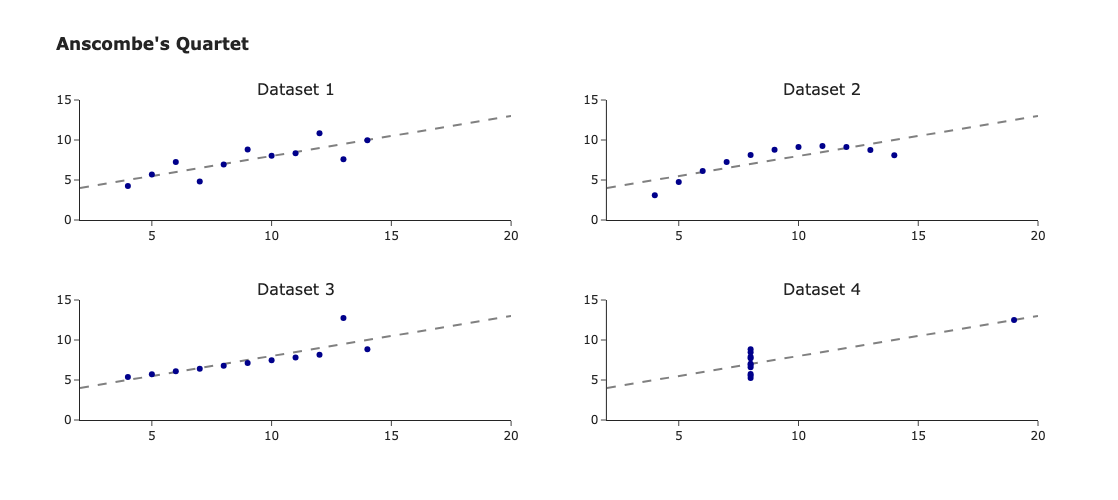

In [56]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"))

fig.add_trace(go.Scatter(x = lin_x, y = lin_y, mode='lines', line=dict(color='grey', dash='dash')),
              row=1, col=1)

fig.add_trace(go.Scatter(x = x1, y = y1, mode='markers', line=dict(color='darkblue')),
              row=1, col=1)

fig.add_trace(go.Scatter(x = lin_x, y = lin_y, mode='lines', line=dict(color='grey', dash='dash')),
              row=1, col=2)

fig.add_trace(go.Scatter(x = x2, y = y2, mode='markers', line=dict(color='darkblue')),
              row=1, col=2)

fig.add_trace(go.Scatter(x = lin_x, y = lin_y, mode='lines', line=dict(color='grey', dash='dash')),
              row=2, col=1)

fig.add_trace(go.Scatter(x = x3, y = y3, mode='markers', line=dict(color='darkblue')),
              row=2, col=1)


fig.add_trace(go.Scatter(x = lin_x, y = lin_y, mode='lines', line=dict(color='grey', dash='dash')),
              row=2, col=2)

fig.add_trace(go.Scatter(x = x4, y = y4, mode='markers', line=dict(color='darkblue')),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="<b>Anscombe's Quartet</b>")

fig.update_layout(showlegend = False)
fig.update_yaxes(range=[0, 15])
fig.update_xaxes(range=[2, 20])
fig.show()